## Support Vector regression

#### importing the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing the Dataset

In [16]:
dataset = pd.read_csv('F://Data_Set/Position_Salaries.csv')

In [17]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


#### Dividing the Dataset into Dependent and Independent Variable

In [18]:
X = dataset.iloc[:,1:-1].values

In [19]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [20]:
Y = dataset.iloc[:,-1].values

In [21]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Here Y is 1 Dimensional array we need to convert it in 2 Dimensional for feature scaling because feature scaling take 2 Dimensional array

In [ ]:
# Y = y.reshape(No of Rows,No of Columns)

In [22]:
Y = Y.reshape(len(Y),1) 

In [23]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

#### Feature Scaling

At the time of feature scaling we create diffrent object for X and Y because during the feature scaling
standardization take min and max value of X and X value ranges from 1 to 10 but Y value ranges from
45000 to 1000000 so X min and max value is useful for Y thats why we need to take diffrent
feature saling object for X and Y

In [9]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc_X = StandardScaler()

In [25]:
X = sc_X.fit_transform(X) 

In [29]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [26]:
sc_Y = StandardScaler()

In [27]:
Y = sc_Y.fit_transform(Y) 

In [28]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

#### Training SVR Model 

In [31]:
from sklearn.svm import SVR

In [32]:
svr_regressor = SVR(kernel='rbf')

In [33]:
svr_regressor.fit(X,Y) 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

#### Predict the Result

**Note:-** Here we use inverse transformation i.e we can converted standardized value again transformed into Original Value.

In [36]:
y_salary = svr_regressor.predict(sc_X.transform([[6.5]]))

In [37]:
y_salary

array([-0.27861589])

**Note :** The value of y_salary value is in the form standardized so we need to inverse
    transform it in to the salary dimension so we take here inverse transformation of y_salary.

In [38]:
sc_Y.inverse_transform(y_salary)

array([170370.0204065])

we also write it like as sc_Y.inverse_transform(svr_regressor.predict(sc_X.transform([[6.5]]))

#### Visualizing the SVR Result 

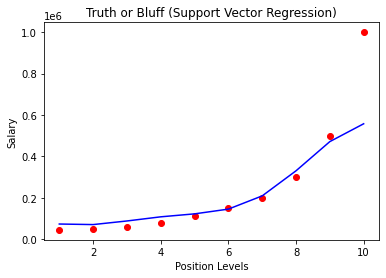

In [54]:
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(svr_regressor.predict(X)),color='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

#### Visualizing the SVR Result (for higher resoulation and smoth curve)

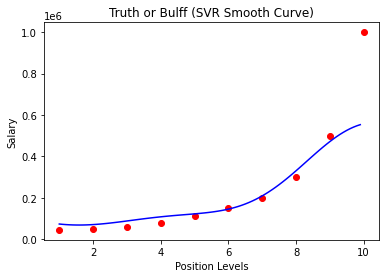

In [55]:
x_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color='red')
plt.plot(x_grid,sc_Y.inverse_transform(svr_regressor.predict(sc_X.transform(x_grid))),color='blue')
plt.title('Truth or Bulff (SVR Smooth Curve)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()